In [1]:
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g_D = constants.hbar * constants.c / (2 * constants.e)
g_D

9.866349022965124e-08

In [3]:
constants.e * 68.5

1.09749099429e-17

In [4]:
(8 / 15.999)

0.500031251953247

In [5]:
def dEdx (n, beta):
    K = .307075 #MeV mol^-1 cm^2
    Z_over_A = 2/3 * (.50002) + 1/3 * (0.40752)
    #I = 2.89 #eV. source: https://www.sciencedirect.com/science/article/pii/S2211379717306952
    I = 485.0
    l_factor = 1 / (1 - beta**2)**.5
    p = 6.04 # g cm^-3
    
    return - p * (n * 68.5)**2 * K * Z_over_A * (np.log(2 * (0.510999) * beta**2 * l_factor**2 / I) - beta**2)

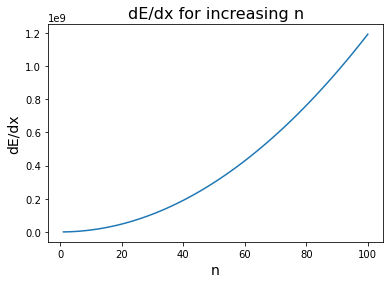

In [6]:
x = np.linspace(1,100,100)
y = dEdx(x, 1e-5)

plt.figure()
plt.title("dE/dx for increasing n", fontsize=16)
plt.xlabel("n", fontsize=14)
plt.ylabel("dE/dx", fontsize=14)

line = plt.plot(x, y)

In [7]:
dEdx(1, 1e-6)

137987.65287129203

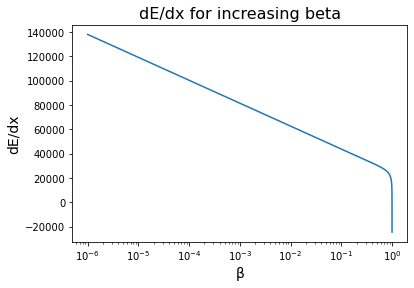

In [8]:
x = np.linspace(1e-6,1 - 1e-6,100000)
y = dEdx(1, x)

plt.figure()
plt.title("dE/dx for increasing beta", fontsize=16)
plt.xlabel("β", fontsize=14)
plt.ylabel("dE/dx", fontsize=14)
plt.gca().set_xscale("log")

line = plt.plot(x,y)

In [9]:
from scipy.integrate import quad

In [10]:
import math

In [1321]:
mu = 3.6415
p = 11.5 #6.04
N = p * constants.N_A/ 55.847  #159.60
g_D = 3.29 * 10**-8
c = 2.9979*10**10
e = 4.8032*10**(-10)
hbar = 1.0546*10**(-27)
m_e = 9.1094 * 10 ** (-28)

In [1322]:
N

1.2400776897595215e+23

In [12]:
dEdx = mu * 4 * constants.pi * hbar * g_D * e * N / (c * m_e) * .6

In [13]:
dEdx * 1000

2.0777713022465796

In [14]:
r = 1/3 * 1.42e-8 + 2/3 * 1.52e-8
Z = 1/3 * 52 + 2/3 * 16
a = hbar**2/(m_e*e**2)

In [15]:
def dEdx(beta):
    return 6*10**5*constants.pi*N*Z*m_e*c**2*(hbar/(m_e*c))**2*(r/a)**2*beta

In [16]:
dEdx(.0001)

6.306264432465748

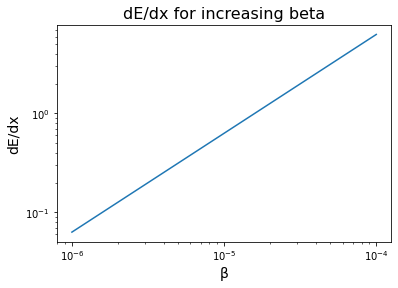

In [17]:
x = np.linspace(1e-6,1e-4,100000)
y = dEdx(x)

plt.figure()
plt.title("dE/dx for increasing beta", fontsize=16)
plt.xlabel("β", fontsize=14)
plt.ylabel("dE/dx", fontsize=14)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")



line = plt.plot(x,y)

In [3]:
import numpy as np
import scipy.optimize
from scipy import constants
from scipy.integrate import quad
from scipy.integrate import quadrature
import matplotlib.pyplot as plt

In [1313]:
m_T = 2.1188477e-22 #g

m_S = 4.663706587e-23 #g
p_S = 4.3 #g/cm3
N_S = p_S/m_S #1/cm3


n = 1
Z = 14
V_0 = 13.6*Z**2*n / (n+1)
a = -1 / .3 * np.log(12*Z*n**2/V_0)

c = 2.99792458e10 #cm/s
beta = 1.0e-4
v_0 = beta*c

E_inc = 1/2*m_S*(beta*c)**2 * 6.242e+11

In [1314]:
v_0

2997924.58

In [1315]:
def U_1(r):
    return V_0 * np.exp(-a * r * 1e+8)

def U_2(r):
    return (1e-8)**4 * 0.097 * Z * n**2 / r**4

(1e-40, 1e+20)

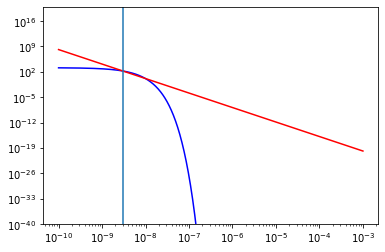

In [1319]:
plt.plot(np.logspace(-10, -3, 1000), U_1(np.logspace(-10, -3, 1000)), color='b')
plt.plot(np.logspace(-10, -3, 1000), U_2(np.logspace(-10, -3, 1000)), color='r')

plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

plt.axvline(.3e-8)

plt.ylim(1e-40, 1e20)

In [633]:
b_0 = 1e-6

def radicand_1(r, b, m, v):
    #return 2*m_T*(1/2*m_T*v_0**2-U_1(r)) - (m_T*b*v_0)**2/r**2
    return 1 - (b / r)**2 - 2*U_1(r) / (m * v**2)

def radicand_2(r, b, m, v):
    #return 2*m_T*(1/2*m_T*v_0**2-U_1(r)) - (m_T*b*v_0)**2/r**2
    return 1 - (b / r)**2 - 2*U_2(r) / (m * v**2)

def min_r(b, m, v):
    alpha = (1e-8)**4 * 0.097 * Z * n**2
    return np.sqrt(b**2/2 + 1/2*np.sqrt(b**4 + 4 * 2 * alpha / m / v**2))

res = scipy.optimize.root_scalar(radicand_2, args=(b_0, m_T, v_0) , bracket=[1e-10, 1e+5], xtol=1e-20) #1e-7)  #, f_tol=1e-35)
r_min = res.root

In [634]:
res

      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 47
           root: 2.0759328480341727e-06

In [635]:
res = scipy.optimize.root_scalar(radicand_2, args=(1e-9, m_T, v_0) , bracket=[1e-20, 1e+3], xtol=1e-20) #1e-7)  #, f_tol=1e-35)
##r_min = res.root
#r_min
res.root

1.9433328112260127e-06

In [636]:
r_min(1e-9, m_T, v_0)

TypeError: 'float' object is not callable

In [ ]:
radicands = []
for r in np.logspace(-10, -1, 1000):
    radicands.append(radicand_2(r, 1e-6, m_T, v_0))

radicands = np.array(radicands)

plt.plot(np.logspace(-10, -1, 1000), radicands)
#plt.plot(np.logspace(-8, -7, 1000), -radicands)
plt.xlabel("r")
plt.ylabel("theta")

#plt.axvline(r_min)
plt.axvline(new_min)

plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [ ]:
r_mins = []

for b in np.logspace(-10, 1, 1000):
    res = scipy.optimize.root_scalar(radicand_2, args=(b, m_T, v_0) , bracket=[1e-20, 1e+3], xtol=1e-20) #1e-7)  #, f_tol=1e-35)
    r_min = res.root
    
    r_mins.append(res.root)

r_mins = np.array(r_mins)

plt.plot(np.logspace(-10, 1, 1000), r_mins)

plt.xlabel("b")
plt.ylabel("r_min")

plt.axhline(.3e-8)

plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [ ]:
def integrand_1(r, b, m, v):
    
    return (b / (r)**2) / np.sqrt(1 - (b/r)**2 - (2*U_1(r) / (m * v**2)))

def integrand_2(r, b, m, v):
    
    return (b / (r)**2) / np.sqrt(1 - (b/r)**2 - (2*U_2(r) / (m * v**2)))

In [ ]:


r_min(b, m_T, v_0)

In [ ]:
integrands = []

b = 2e-5

for r in np.logspace(-6, 3, 1000):
    
    integrands.append(integrand_2(r, b, m_T, v_0))

integrands = np.array(integrands)

array = plt.plot(np.logspace(-6, 3, 1000), integrands)
#array = plt.plot(np.logspace(-8, 20, 1000), -integrands)

#res = scipy.optimize.root_scalar(radicand_2, args=(b, m_T, v_0) , bracket=[1e-20, 1e+5], xtol=1e-25) #1e-7)  #, f_tol=1e-35)
#r_min2 = res.root



#plt.plot(np.logspace(-6,2,1000),1/np.logspace(-8,5,1000))

r_min = min_r(b, m_T, v_0)


plt.axvline(r_min)


plt.xlabel("r")
plt.ylabel("integrand")


plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

#phi = quad(integrand_2, r_min, 1.0, args=(b, m_T, v_0) , epsabs=0, limit=10000)[0] #+ quad(integrand_2, 1, np.inf, args=(b, m_T, v_0) , epsabs=0, limit=200)[0] #, full_output=1)
phi = quad(integrand_2, r_min, .9, args=(b, m_T, v_0) , epsabs=0, limit=10000)[0] + quad(integrand_2, .9,1.1, args=(b, m_T, v_0) , epsabs=0, limit=200)[0] + quad(integrand_2, 1.1, np.inf, args=(b, m_T, v_0) , epsabs=0, limit=200)[0] #, full_output=1)


theta = np.pi - 2*phi
theta

In [ ]:
integrands = []

b = 1.2e-5

for r in np.logspace(-6, 3, 1000):
    
    integrands.append(integrand_2(r, b, m_T, v_0))

integrands = np.array(integrands)

array = plt.plot(np.logspace(-6, 3, 1000), integrands)
#array = plt.plot(np.logspace(-8, 20, 1000), -integrands)

#res = scipy.optimize.root_scalar(radicand_2, args=(b, m_T, v_0) , bracket=[1e-20, 1e+5], xtol=1e-25) #1e-7)  #, f_tol=1e-35)
#r_min2 = res.root



#plt.plot(np.logspace(-6,2,1000),1/np.logspace(-8,5,1000))

r_min = min_r(b, m_T, v_0)


plt.axvline(r_min)


plt.xlabel("r")
plt.ylabel("integrand")


plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

phi = quad(integrand_2, r_min, 1, args=(b, m_T, v_0) , epsabs=0, limit=200)[0] #+ quad(integrand_2, 1, np.inf, args=(b, m_T, v_0) , epsabs=0, limit=200)[0] #, full_output=1)
theta = np.pi - 2*phi
theta
#phi

In [ ]:
quad(integrand_2, r_min, 1, args=(b, m_T, v_0) , epsabs=0) #, full_output=1)

In [ ]:
integrand_2(.011, b, m_T, v_0)

In [ ]:
np.logspace(-1,3,20)[::-1]

In [637]:
from math import floor, log10
round_to_n = lambda x, n: round(x, -int(floor(log10(x))) + (n - 1))

def theta_b (b, m ,v):
    
    res = scipy.optimize.root_scalar(radicand_1, args=(b, m, v) , bracket=[1e-20, 1e+5], xtol=1e-25) #1e-7)  #, f_tol=1e-35)
    r_min1 = res.root
    
    #res = scipy.optimize.root_scalar(radicand_2, args=(b, m, v) , bracket=[1e-20, 1e+5], xtol=1e-25) #1e-7)  #, f_tol=1e-35)
    #r_min2 = res.root
    r_min2 = min_r(b, m, v)
        
    #print(r_min1)
    #print(r_min2)

    if r_min2 > .3e-8:
        I_1 = 0
        u = 0
         
        if r_min2 < 1e-4:
            bound = 1e-4
        elif r_min2 < 1.0:
            bound = 1.0
        else:
            return 0 
        
        I_2 = quad(integrand_2, r_min2, bound, args=(b, m, v), epsrel=0, epsabs=1e-16, limit=1000)[0] +\
                quad(integrand_2, bound, np.inf, args=(b, m, v), epsrel=0, epsabs=1e-16, limit=1000)[0]
        
        
        #while(err >= 1e-1 or np.pi - 2 * I_2 < 0):
        #    I_2, err = quad(integrand_2, r_min2, np.logspace(-1,3,30)[::-1][u], args=(b, m, v), epsabs=0)
        #    u += 1
        #else:
    else:
        print('check')
        I_1 = quad(integrand_1, r_min1, .3e-8, args=(b, m, v), epsabs=0)[0]
        I_2 = quad(integrand_2, .3e-8, np.inf, args=(b, m, v), epsabs=0)[0]
        
    #I_2 = quad(integrand_2, .3e-8, np.inf, args=(b, m, v), epsabs=0)[0]
    
    phi = I_1 + I_2
    
    theta =  np.pi - 2 * phi
    
    if theta < 1e-10:
        return 0
    else:
        return theta
    
    
    
    #return  quad(integrand_2, .3, 1e+10, b)[0]

In [638]:
theta(1e-14, m_T, v_0)

TypeError: theta() takes 2 positional arguments but 3 were given

In [639]:
np.pi

3.141592653589793

In [649]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [1100]:
thetas = []

thetas = np.array([theta_b(b, m_S, v_0) for b in np.logspace(-20, -3, 1000)])
x = thetas
#x[0] = np.pi
#x[-1] = 0
x = x[::-1]
y = np.logspace(-20, -3, 1000)
y = y[::-1]
#b = interp1d(x, y, kind='cubic')
b = CubicSpline(x, y)

/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested toler

In [1213]:
theta_b(.001, m_S, v_0 )

/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


1.5125989349940028e-10

/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


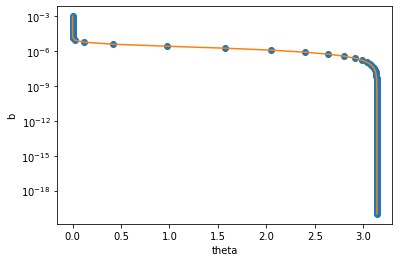

In [1260]:
ynew = np.logspace(-20, -3, 100)
xnew = [theta_b(b, m_S, v_0) for b in ynew]

plt.plot(xnew, ynew, 'o')
plt.plot(xnew, b(xnew))

plt.xlabel("theta")
plt.ylabel("b")

plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")



/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


Text(0, 0.5, 'b')

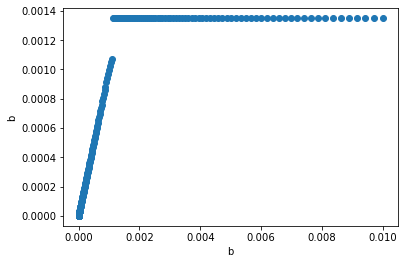

In [1261]:
xnew = np.logspace(-15, -2, 1000)
#plt.plot(xnew, b(xnew))

ynew = np.array([b(theta_b(x, m_S, v_0)) for x in xnew])

plt.scatter(xnew, ynew)

plt.xlabel("b")
plt.ylabel("b")

#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")

In [1262]:
b(1e-10)

array(0.0010894)

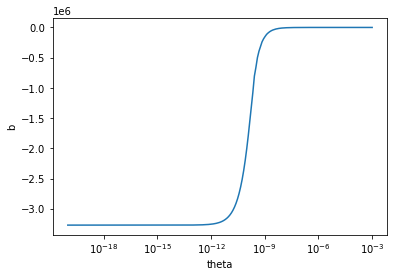

In [1263]:
xnew = np.logspace(-20, -3, 200)
plt.plot(xnew, b.derivative()(xnew))

plt.xlabel("theta")
plt.ylabel("b")

#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [1264]:
b.derivative()(0)

array(-3269548.97676032)

In [1265]:
b.derivative()(np.pi/2)

array(-1.28115429e-06)

In [1266]:
def theta(K, E): 
    return 2 * np.arcsin(np.sqrt(K/(4*E)))

In [1267]:
def sigma(K, E):
    return - b.derivative()(theta(K, E)) * b(theta(K, E)) / np.sin(theta(K, E))

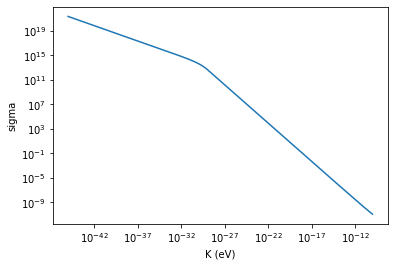

In [1297]:
Ks = np.logspace(-45, -10, 1000)

plt.ylabel("sigma")
plt.xlabel("K (eV)")

plt.plot(Ks, sigma(Ks, E_inc))

plt.gca().set_xscale("log")
plt.gca().set_yscale("log")



In [1269]:
b(theta(1e-30, E_inc))

array(0.00134874)

In [1270]:
b.derivative()(theta(1e-15, E_inc))

array(-43724.12279246)

In [1295]:
E_inc = 1/2*m_S*(beta*c)**2 

In [1296]:
E_inc

2.0957652235876298e-10

In [1301]:
def dEdx(beta):
    E_inc = 1/2*m_S*(beta*c)**2 #* 6.242e+11 # ergs -> eV
    
    
    
    #boundaries = [0, 1e-15, 1e-10, 1e-5, 1, 4*E_inc]
    boundaries = [0, 1e-30, 1e-25, 1e-20, 1e-15, 4*E_inc]
    
    summ = 0
    for i in range(len(boundaries) - 1):
        if boundaries[i] == 0:
            res = quad(sigma, 0, boundaries[i + 1], args=(E_inc), points=[0])
        else:
            res = quad(sigma, boundaries[i], boundaries[i+1], args=(E_inc))
            
        if res[0] < 0:
            print("error")
            return None
        else:
            summ += res[0]
        
    return N_S*summ
    
    
    return quad(sigma, 0, 1e-15, args=(E_inc), points=[0])[0] +\
        quad(sigma, 1e-15, 1e-10, args=(E_inc),  epsrel=0, epsabs=1e-12)[0] + \
        quad(sigma, 1e-10, 1e-5, args=(E_inc), epsrel=0, epsabs=1e-12)[0] +\
        quad(sigma, 1e-5, 1, args=(E_inc), epsrel=0, epsabs=1e-12)[0] +\
        quad(sigma, 1, E_inc, args=(E_inc), epsrel=0, epsabs=1e-12)[0]

    return N_S * quad(sigma, 0, E_inc, args=(E_inc))[0]


In [1302]:
dEdx(1e-5)
#quad(sigma, 1e-15, 1e-10, args=(E_inc),  epsrel=0, epsabs=1e-12)[0]

278464.77683752484

Text(0.5, 0, 'beta')

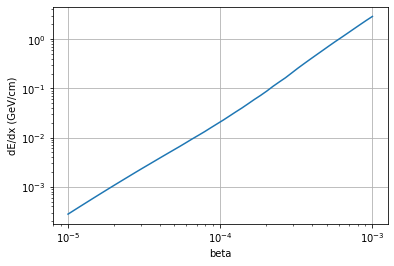

In [1303]:
betas = np.logspace(-5, -3, 50)
Es = [dEdx(beta)*1e-9 for beta in betas]

plt.plot(betas, Es)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.grid()

plt.ylabel("dE/dx (GeV/cm)")
plt.xlabel("beta")